# Лабораторна робота №4
з дисципліни "Нейронні мережі"

студента групи АнД-41

Айрапетов Давид

Варіант № 1
Завдання
Виконати вирішення задачs класифікації для 3 класів з набору даних food101.

Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи.

Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb.

Результати викласти у репозиторії GitHub (папка Lab4).

Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою).

Індекси за варіантом: 0,30,60

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, subplots, show
import random
import os
import time
import pathlib
import pandas as pd
import numpy as np
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam

In [127]:
for dirpath, dirnames, filenames in os.walk("C:/Users/mrdip/Desktop/lr4/101_food"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'C:/Users/mrdip/Desktop/lr4/101_food'.
There are 3 directories and 0 images in 'C:/Users/mrdip/Desktop/lr4/101_food\test'.
There are 0 directories and 250 images in 'C:/Users/mrdip/Desktop/lr4/101_food\test\apple_pie'.
There are 0 directories and 250 images in 'C:/Users/mrdip/Desktop/lr4/101_food\test\deviled_eggs'.
There are 0 directories and 250 images in 'C:/Users/mrdip/Desktop/lr4/101_food\test\lobster_bisque'.
There are 3 directories and 0 images in 'C:/Users/mrdip/Desktop/lr4/101_food\train'.
There are 0 directories and 75 images in 'C:/Users/mrdip/Desktop/lr4/101_food\train\apple_pie'.
There are 0 directories and 75 images in 'C:/Users/mrdip/Desktop/lr4/101_food\train\deviled_eggs'.
There are 0 directories and 75 images in 'C:/Users/mrdip/Desktop/lr4/101_food\train\lobster_bisque'.


In [128]:
data_dir = pathlib.Path("C:/Users/mrdip/Desktop/lr4/101_food/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['apple_pie' 'deviled_eggs' 'lobster_bisque']


In [129]:
def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (384, 512, 3)


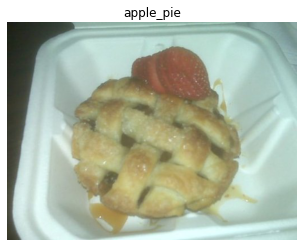

In [130]:
# View a random image from the training dataset
img = view_random_image(target_dir="C:/Users/mrdip/Desktop/lr4/101_food/train/",
                        target_class="apple_pie")

Image shape: (512, 512, 3)


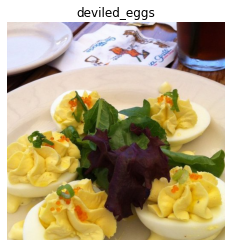

In [131]:
img = view_random_image(target_dir="C:/Users/mrdip/Desktop/lr4/101_food/train/",
                        target_class="deviled_eggs")

Image shape: (512, 512, 3)


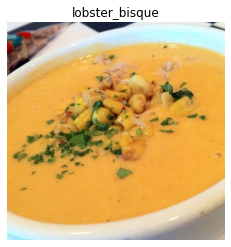

In [132]:
img = view_random_image(target_dir="C:/Users/mrdip/Desktop/lr4/101_food/train/",
                        target_class="lobster_bisque")

In [133]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Setup the train and test directories
train_dir = "C:/Users/mrdip/Desktop/lr4/101_food/train/"
test_dir = "C:/Users/mrdip/Desktop/lr4/101_food/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [134]:
tf.random.set_seed(42)
model_1 = tf.keras.models.Sequential([
  Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2,  padding="valid"), # padding can also be 'same'
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"), 
  MaxPool2D(2),
  Flatten(),
  Dense(3, activation="softmax")])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


# Fit the model
history_1 = model_1.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
8/8 [==============================] - 15s 2s/step - loss: 31.8467 - accuracy: 0.3244 - val_loss: 12.1081 - val_accuracy: 0.3160
Epoch 2/10
8/8 [==============================] - 12s 2s/step - loss: 5.7456 - accuracy: 0.4133 - val_loss: 5.8418 - val_accuracy: 0.3707
Epoch 3/10
8/8 [==============================] - 12s 2s/step - loss: 2.1434 - accuracy: 0.5422 - val_loss: 1.8469 - val_accuracy: 0.4267
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.8054 - accuracy: 0.6933 - val_loss: 1.4937 - val_accuracy: 0.3867
Epoch 5/10
8/8 [==============================] - 12s 2s/step - loss: 0.5014 - accuracy: 0.7911 - val_loss: 1.3258 - val_accuracy: 0.3933
Epoch 6/10
8/8 [==============================] - 12s 2s/step - loss: 0.3903 - accuracy: 0.8711 - val_loss: 1.3420 - val_accuracy: 0.4093
Epoch 7/10
8/8 [==============================] - 11s 2s/step - loss: 0.2829 - accuracy: 0.9333 - val_loss: 1.4680 - val_accuracy: 0.4253
Epoch 8/10
8/8 [================

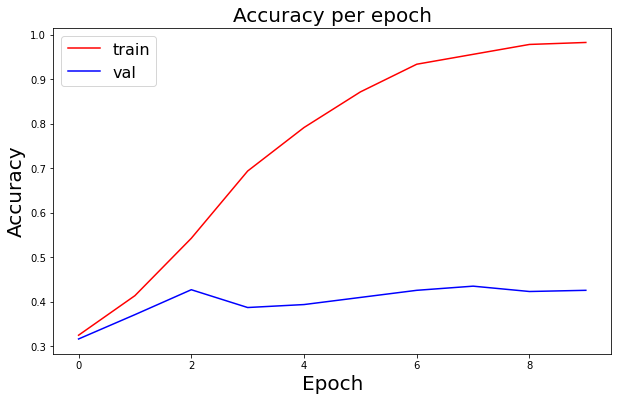

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_1.history['accuracy'], 'r', label='train')
ax.plot(history_1.history['val_accuracy'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.title("Accuracy per epoch", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)
 

In [136]:
train_datagen_norm = ImageDataGenerator(rescale = 1/255.)
test_datagen_norm = ImageDataGenerator(rescale = 1/255.)

# Setup the train and test directories
train_dir = "C:/Users/mrdip/Desktop/lr4/101_food/train/"
test_dir = "C:/Users/mrdip/Desktop/lr4/101_food/test/"

# Import data from directories and turn it into batches
train_data_norm = train_datagen_norm.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

test_data_norm = test_datagen_norm.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)


Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [137]:
tf.random.set_seed(42)
history_1_norm = model_1.fit(train_data_norm,epochs=10,validation_data=test_data_norm)

Epoch 1/10
8/8 [==============================] - 12s 2s/step - loss: 1.0802 - accuracy: 0.4000 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 2/10
8/8 [==============================] - 12s 2s/step - loss: 1.0768 - accuracy: 0.3467 - val_loss: 1.0998 - val_accuracy: 0.3320
Epoch 3/10
8/8 [==============================] - 12s 2s/step - loss: 1.0692 - accuracy: 0.6000 - val_loss: 1.0978 - val_accuracy: 0.3573
Epoch 4/10
8/8 [==============================] - 12s 2s/step - loss: 1.0591 - accuracy: 0.6444 - val_loss: 1.0973 - val_accuracy: 0.3613
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 1.0527 - accuracy: 0.5156 - val_loss: 1.0972 - val_accuracy: 0.3347
Epoch 6/10
8/8 [==============================] - 12s 2s/step - loss: 1.0406 - accuracy: 0.6267 - val_loss: 1.0904 - val_accuracy: 0.4107
Epoch 7/10
8/8 [==============================] - 12s 2s/step - loss: 1.0337 - accuracy: 0.7333 - val_loss: 1.0897 - val_accuracy: 0.3987
Epoch 8/10
8/8 [==================

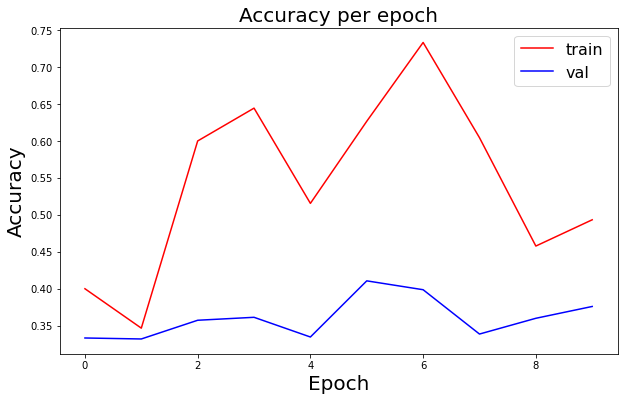

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_1_norm.history['accuracy'], 'r', label='train')
ax.plot(history_1_norm.history['val_accuracy'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.title("Accuracy per epoch", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)


In [139]:
train_datagen_norm_aug = ImageDataGenerator(rescale = 1/255., horizontal_flip = True,
                                   brightness_range = (0.2, 0.4), shear_range = 0.2, zoom_range = 0.2,  
                                   rotation_range = 0.3)

# Setup the train and test directories
train_dir = "C:/Users/mrdip/Desktop/lr4/101_food/train/"
test_dir = "C:/Users/mrdip/Desktop/lr4/101_food/test/"

# Import data from directories and turn it into batches
train_data_norm_aug = train_datagen_norm_aug.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

Found 225 images belonging to 3 classes.


In [140]:
tf.random.set_seed(42)
first_model_time = time.time()
history_1_transform = model_1.fit(train_data_norm_aug,epochs=10,validation_data=test_data_norm)
time_1 = time.time() - first_model_time

Epoch 1/10
8/8 [==============================] - 14s 2s/step - loss: 1.0696 - accuracy: 0.4044 - val_loss: 1.1012 - val_accuracy: 0.3520
Epoch 2/10
8/8 [==============================] - 14s 2s/step - loss: 1.0507 - accuracy: 0.4311 - val_loss: 1.1024 - val_accuracy: 0.3440
Epoch 3/10
8/8 [==============================] - 13s 2s/step - loss: 1.0492 - accuracy: 0.4489 - val_loss: 1.1038 - val_accuracy: 0.3387
Epoch 4/10
8/8 [==============================] - 13s 2s/step - loss: 1.0504 - accuracy: 0.4711 - val_loss: 1.1004 - val_accuracy: 0.3453
Epoch 5/10
8/8 [==============================] - 13s 2s/step - loss: 1.0528 - accuracy: 0.4444 - val_loss: 1.0913 - val_accuracy: 0.3760
Epoch 6/10
8/8 [==============================] - 13s 2s/step - loss: 1.0458 - accuracy: 0.4667 - val_loss: 1.0956 - val_accuracy: 0.3707
Epoch 7/10
8/8 [==============================] - 13s 2s/step - loss: 1.0236 - accuracy: 0.5244 - val_loss: 1.1122 - val_accuracy: 0.3653
Epoch 8/10
8/8 [==================

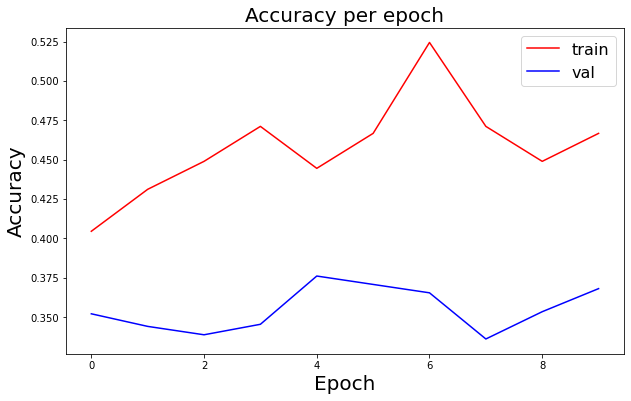

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_1_transform.history['accuracy'], 'r', label='train')
ax.plot(history_1_transform.history['val_accuracy'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.title("Accuracy per epoch", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

In [142]:
tf.random.set_seed(42)
history_2_transform = model_1.fit(train_data_norm_aug,epochs=20,validation_data=test_data_norm)

Epoch 1/20
8/8 [==============================] - 13s 2s/step - loss: 1.0113 - accuracy: 0.4933 - val_loss: 1.1008 - val_accuracy: 0.3747
Epoch 2/20
8/8 [==============================] - 13s 2s/step - loss: 1.0235 - accuracy: 0.4667 - val_loss: 1.1091 - val_accuracy: 0.3693
Epoch 3/20
8/8 [==============================] - 12s 2s/step - loss: 1.0631 - accuracy: 0.4356 - val_loss: 1.1136 - val_accuracy: 0.3800
Epoch 4/20
8/8 [==============================] - 12s 2s/step - loss: 1.0680 - accuracy: 0.4756 - val_loss: 1.1066 - val_accuracy: 0.3627
Epoch 5/20
8/8 [==============================] - 13s 2s/step - loss: 1.0544 - accuracy: 0.4756 - val_loss: 1.1058 - val_accuracy: 0.3467
Epoch 6/20
8/8 [==============================] - 13s 2s/step - loss: 1.0288 - accuracy: 0.4533 - val_loss: 1.1074 - val_accuracy: 0.3747
Epoch 7/20
8/8 [==============================] - 13s 2s/step - loss: 1.0371 - accuracy: 0.4622 - val_loss: 1.1018 - val_accuracy: 0.3853
Epoch 8/20
8/8 [==================

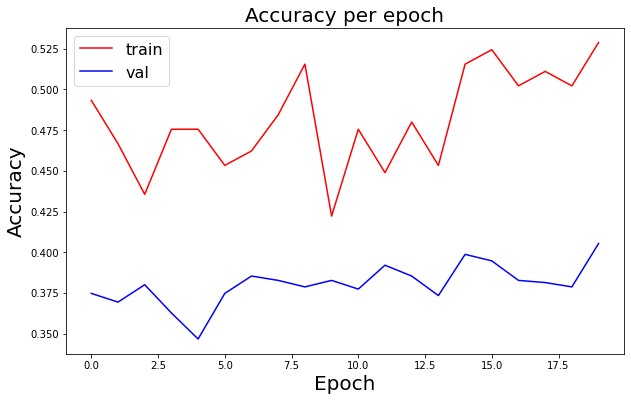

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_2_transform.history['accuracy'], 'r', label='train')
ax.plot(history_2_transform.history['val_accuracy'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.title("Accuracy per epoch", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

In [144]:
tf.random.set_seed(42)
model_drop = tf.keras.models.Sequential([
  Conv2D(filters=10, kernel_size=2, activation="relu", input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  MaxPool2D(2),
  Dropout(0.2),
  Flatten(),
  Dense(3, activation="softmax")])

# Compile the model
model_drop.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

tf.random.set_seed(42)
second_model_time = time.time()
history_drop = model_drop.fit(train_data_norm_aug,epochs=10,validation_data=test_data_norm)
time_2 = time.time() - second_model_time

Epoch 1/10
8/8 [==============================] - 8s 1s/step - loss: 1.4869 - accuracy: 0.3511 - val_loss: 3.3931 - val_accuracy: 0.3587
Epoch 2/10
8/8 [==============================] - 8s 1s/step - loss: 1.1245 - accuracy: 0.4933 - val_loss: 1.8769 - val_accuracy: 0.4413
Epoch 3/10
8/8 [==============================] - 8s 1s/step - loss: 1.0560 - accuracy: 0.4622 - val_loss: 2.1313 - val_accuracy: 0.4227
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 1.0393 - accuracy: 0.4800 - val_loss: 3.2441 - val_accuracy: 0.3707
Epoch 5/10
8/8 [==============================] - 8s 1s/step - loss: 1.0334 - accuracy: 0.5289 - val_loss: 2.2470 - val_accuracy: 0.4880
Epoch 6/10
8/8 [==============================] - 8s 1s/step - loss: 0.9439 - accuracy: 0.5511 - val_loss: 1.7050 - val_accuracy: 0.4667
Epoch 7/10
8/8 [==============================] - 8s 1s/step - loss: 0.9105 - accuracy: 0.5956 - val_loss: 1.8185 - val_accuracy: 0.4613
Epoch 8/10
8/8 [=========================

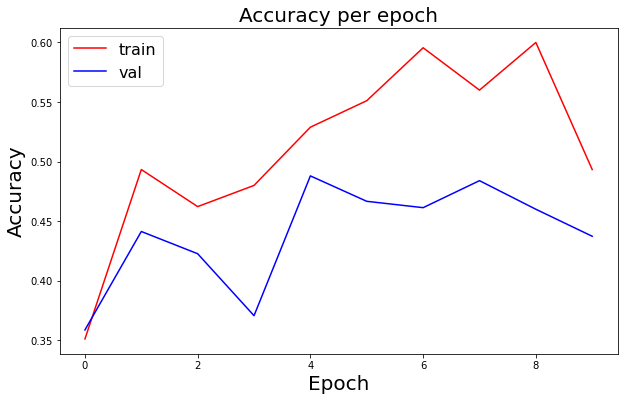

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_drop.history['accuracy'], 'r', label='train')
ax.plot(history_drop.history['val_accuracy'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.title("Accuracy per epoch", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)